In [1]:
import seaborn as sns
import json
import pandas as pd
import numpy as np


def load_data(file: str, label: str, other: bool):
    maps = {}
    with open(file) as f:
        for line in f:
            if line.startswith("{"):
                x = json.loads(line)
                if x.get("type") == "map" and x.get("data", {}) is not None:
                    for k, v in x.get("data").items():
                        maps[k] = v
    map = maps["@instr_samples"] if not other else maps["@instr_samples_other"]
    entries = [(k, v) for k, v in map.items()]
    entries.sort(key=lambda x: x[1])
    total_samples = sum(x[1] for x in entries)
    total_instructions = len(map)
    print(f"[{label}] Total samples: {total_samples}, Total instructions: {total_instructions}")
    entries_w_index = [(float(i + 1) / len(entries), x[0], x[1]) for i, x in enumerate(entries)]
    entries_cumu = []
    s = 0
    for i, x in enumerate(entries_w_index):
        s += x[2]
        entries_cumu.append((x[0], x[1], x[2], s))  # (index, ipaddr, samples, samples.cumulative)
    entries_cumu_norm = [(x[0], x[1], x[2], x[3], x[2] / total_samples, x[3] / total_samples) for x in entries_cumu]
    df = pd.DataFrame(entries_cumu_norm, columns=["ip", "ip.addr", "samples", "samples.cumu", "samples.norm", "samples.cumu.norm"])
    # print(df)
    return df


def plot(**files: str):
    dfs = []
    for k, v in files.items():
        if k.endswith("other"):
            df = load_data(v, label=k, other=True)
        else:
            df = load_data(v, label=k, other=False)
        df["gc"] = k
        dfs.append(df)
    df = pd.concat(dfs)

    g = sns.lineplot(data=df, x="ip", y="samples.cumu.norm", hue="gc")

    if g.axes:
        g.axes.grid(True, axis="both")

    g.set_xticks(np.arange(0, 1.1, 0.1))
    g.set_yticks(np.arange(0, 1.1, 0.1))

    return df

# Luseach (No CompressedOops, 512M heap)

[ix] Total samples: 865730, Total instructions: 8041
[lxr] Total samples: 326990, Total instructions: 9073
[g1] Total samples: 322744, Total instructions: 7796
[shen] Total samples: 925520, Total instructions: 7257
[z] Total samples: 2460228, Total instructions: 8282
[par] Total samples: 689247, Total instructions: 6696
[other] Total samples: 18062196, Total instructions: 204254


,ip,ip.addr,samples,samples.cumu,samples.norm,samples.cumu.norm,gc
0,0.000124,0x7d15781f6dce,1,1,0.000001,0.000001,ix
1,0.000249,0x7d15781c28d0,1,2,0.000001,0.000002,ix
2,0.000373,0x7d1579cae212,1,3,0.000001,0.000003,ix
3,0.000497,0x7d1579412e06,1,4,0.000001,0.000005,ix
4,0.000622,0xffffffff95226e81,1,5,0.000001,0.000006,ix
...,...,...,...,...,...,...,...
204249,0.999980,0x7729e8314e2c,211349,16267755,0.011701,0.900652,other
204250,0.999985,0x7729e8314f0e,334542,16602297,0.018522,0.919174,other
204251,0.999990,0x7729e8314dd8,350903,16953200,0.019427,0.938601,other
204252,0.999995,0x7729e8314f5b,467182,17420382,0.025865,0.964466,other


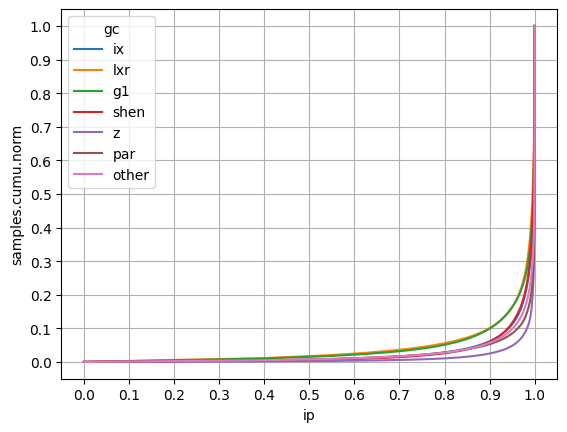

In [2]:
plot(
    ix="../../lusearch-ix.jsonl",
    lxr="../../lusearch-lxr.jsonl",
    g1="../../lusearch-g1.jsonl",
    shen="../../lusearch-shen.jsonl",
    z="../../lusearch-z.jsonl",
    par="../../lusearch-par.jsonl",
    other="../../lusearch-g1.jsonl",
)

# H2 (No CompressedOops, 1G heap)

[ix] Total samples: 21143168, Total instructions: 12298
[lxr] Total samples: 3590639, Total instructions: 11136
[g1] Total samples: 10235384, Total instructions: 15573
[shen] Total samples: 33385677, Total instructions: 8772
[z] Total samples: 45932321, Total instructions: 10095
[par] Total samples: 10019001, Total instructions: 7709
[other] Total samples: 25040341, Total instructions: 243862


,ip,ip.addr,samples,samples.cumu,samples.norm,samples.cumu.norm,gc
0,0.000081,0xffffffff9618c49b,1,1,4.729660e-08,4.729660e-08,ix
1,0.000163,0x76822aff8d60,1,2,4.729660e-08,9.459320e-08,ix
2,0.000244,0xffffffff953e3d52,1,3,4.729660e-08,1.418898e-07,ix
3,0.000325,0xffffffff95222ca2,1,4,4.729660e-08,1.891864e-07,ix
4,0.000407,0x76822c055d3b,1,5,4.729660e-08,2.364830e-07,ix
...,...,...,...,...,...,...,...
243857,0.999984,0x78898c606feb,268946,22086236,1.074051e-02,8.820262e-01,other
243858,0.999988,0x78898c3dca4a,361649,22447885,1.444265e-02,8.964688e-01,other
243859,0.999992,0x78898c3dca4e,425027,22872912,1.697369e-02,9.134425e-01,other
243860,0.999996,0x78898c470242,708154,23581066,2.828053e-02,9.417230e-01,other


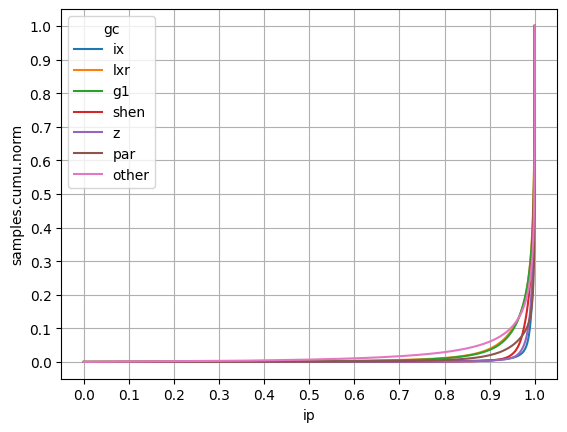

In [3]:
plot(
    ix="../../h2-ix.jsonl",
    lxr="../../h2-lxr.jsonl",
    g1="../../h2-g1.jsonl",
    shen="../../h2-shen.jsonl",
    z="../../h2-z.jsonl",
    par="../../h2-par.jsonl",
    other="../../h2-g1.jsonl",
)

# Kafka (No CompressedOops, 512M heap)

[ix] Total samples: 357414, Total instructions: 5553
[lxr] Total samples: 115293, Total instructions: 6297
[g1] Total samples: 206437, Total instructions: 8226
[shen] Total samples: 396836, Total instructions: 6028
[z] Total samples: 2067530, Total instructions: 6795
[par] Total samples: 523144, Total instructions: 5392
[other] Total samples: 2778605, Total instructions: 201032


,ip,ip.addr,samples,samples.cumu,samples.norm,samples.cumu.norm,gc
0,0.000180,0x786adcc79430,1,1,0.000003,0.000003,ix
1,0.000360,0x786add245c00,1,2,0.000003,0.000006,ix
2,0.000540,0xffffffff9544e772,1,3,0.000003,0.000008,ix
3,0.000720,0xffffffff9522616b,1,4,0.000003,0.000011,ix
4,0.000900,0x786adbfab9f2,1,5,0.000003,0.000014,ix
...,...,...,...,...,...,...,...
201027,0.999980,0x7ffd00fde86c,22675,2643360,0.008161,0.951326,other
201028,0.999985,0xffffffff961ad787,23788,2667148,0.008561,0.959887,other
201029,0.999990,0xffffffff96245f55,26269,2693417,0.009454,0.969341,other
201030,0.999995,0x7ffd00fdeb03,33402,2726819,0.012021,0.981363,other


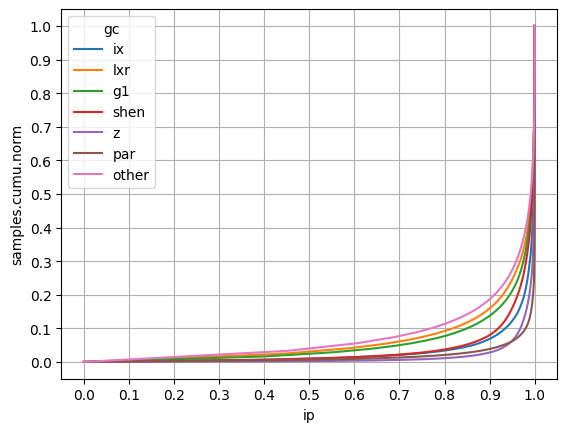

In [4]:
plot(
    ix="../../kafka-ix.jsonl",
    lxr="../../kafka-lxr.jsonl",
    g1="../../kafka-g1.jsonl",
    shen="../../kafka-shen.jsonl",
    z="../../kafka-z.jsonl",
    par="../../kafka-par.jsonl",
    other="../../kafka-g1.jsonl",
)